In [1]:
import matplotlib.pyplot as plt
import ast
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [51]:
font = {'family': 'serif',
        'size': 34}

In [2]:
file = open("log_output.json", "r")

contents = file.read()
data = ast.literal_eval(contents)

In [3]:
print(data.keys())

dict_keys(['24', '25', '26', '27', '20', '21', '22', '23', '28', '29', '0', '4', '8', '59', '58', '55', '54', '57', '56', '51', '50', '53', '52', '88', '89', '82', '83', '80', '81', '86', '87', '84', '85', '3', '7', 'metadata', '39', '38', '33', '32', '31', '30', '37', '36', '35', '34', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '2', '6', '99', '98', '91', '90', '93', '92', '95', '94', '97', '96', '11', '10', '13', '12', '15', '14', '17', '16', '19', '18', '48', '49', '46', '47', '44', '45', '42', '43', '40', '41', '1', '5', '9', '77', '76', '75', '74', '73', '72', '71', '70', '79', '78'])


In [4]:
yn_1, ym_1, predicted_1, actual_1, u_optimal_list_1, elapsed_1, signal_1 = [], \
    [], [], [], [], [], []
for key in data.keys():
    if key!='metadata':
        ym_1+=[data[key]['ym']]
        yn_1+=[data[key]['yn']]
        actual_1+=[data[key]['actual']]
        u_optimal_list_1 +=[data[key]['u']]
        elapsed_1+=[data[key]['elapsed']]
        signal_1+=[data[key]['signal']]
NUM_EXPERIMENTS=data['metadata']['num_experiments']
NUM_TIMESTEPS = data['metadata']['num_timesteps']
neutral_point=data['metadata']['neutral_point']

In [40]:
ym = 1000.*np.reshape(ym_1, (NUM_EXPERIMENTS, -1, 3))
yn = 1000.*np.reshape(yn_1, (NUM_EXPERIMENTS, -1, 3))
actual = 1000.*np.reshape(actual_1, (NUM_EXPERIMENTS, -1, 3))
elapsed = np.reshape(elapsed_1, (NUM_EXPERIMENTS, -1, 1))
signal = np.reshape(signal_1, (NUM_EXPERIMENTS, -1, 11))
u_optimal_list = np.reshape(u_optimal_list_1, (NUM_EXPERIMENTS, -1, 2))

In [6]:
error_p = np.sqrt(((yn - actual)**2).mean(axis = -1))
error_c = np.sqrt(((actual - ym)**2).mean(axis = -1))

In [17]:
print("Control loop time = ", np.mean(np.abs(elapsed)), r"$\pm$", np.std(elapsed, ddof=0))
print("Prediction RMS error = ", error_p.mean(), r"$\pm$", np.std(error_p, ddof=0))
print("Control RMS error = ", error_c.mean(), r"$\pm$", np.std(error_c, ddof = 0) )

Control loop time =  0.11043307009339333 $\pm$ 0.009700731722528052
Prediction RMS error =  7.381064352459065 $\pm$ 3.8633710491174846
Control RMS error =  5.047135980195481 $\pm$ 1.8263094467922019


In [18]:
# Zeroing States:

max_target= np.max(ym, axis = (0, 1))
min_target= np.min(ym, axis = (0, 1))
shift = (max_target + min_target) / 2.

In [19]:
color_palette = ['#1446A0', '#DB3069', '#F5D547', '#F5D547','#3C3C3B']
labels = ['x', 'y', 'z', 'u']

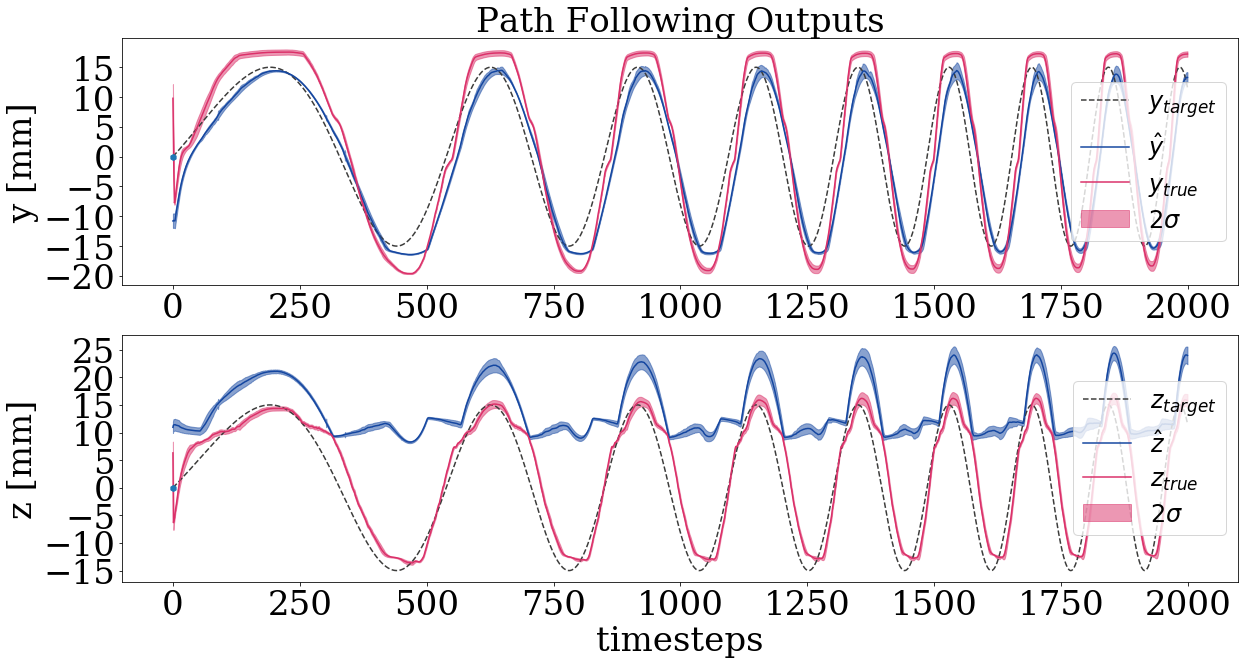

In [87]:
plt.figure(figsize=(20,10))
AXIS = 0
timesteps = range(max(yn.shape))
for i in range(1, 3, 1):
    plt.subplot(2, 1, i)
    plt.plot(np.mean(ym, axis = AXIS)[:, i] - shift[i], color = color_palette[-1], linestyle = 'dashed', label =r"$" + labels[i] + "_{target}$")
    plt.plot(np.mean(yn, axis = AXIS)[:, i] - shift[i], color_palette[0], label = r"$\hat{" + labels[i] + "}$" )
    plt.fill_between(timesteps, np.mean(yn, axis = AXIS)[:, i] - np.std(yn, axis = AXIS)[:, i] - shift[i],
                        np.mean(yn, axis = AXIS)[:, i] + np.std(yn, axis = AXIS)[:, i] - shift[i],
                            color = color_palette[0], alpha = 0.5)
    plt.plot(np.mean(actual, axis = AXIS)[:, i] - shift[i], color = color_palette[1], label =r"$" + labels[i] + "_{true}$") # only 0 and 2

    plt.fill_between(timesteps, np.mean(actual, axis = AXIS)[:, i] - np.std(actual, axis = AXIS)[:, i] - shift[i],
                                    np.mean(actual, axis = AXIS)[:, i] + np.std(actual, axis = AXIS)[:, i] - shift[i],
                                        color = color_palette[1], alpha = 0.5, label = r"$2\sigma$")

    plt.legend(prop = {"family": "Times New Roman", "size": 24}, loc= 'right', frameon= True)
    plt.ylabel(str(labels[i]) + ' [mm]', **font)
    plt.xticks(fontsize=24, **font)
    plt.yticks(fontsize=24, **font)
    plt.plot(1000*neutral_point[i]- shift[i], marker = 'h')
    if i==2:
        plt.xlabel('timesteps', **font)
    if i==1:
        plt.title("Path Following Outputs", **font)
        
plt.savefig('path_follow.png', dpi = 300 )

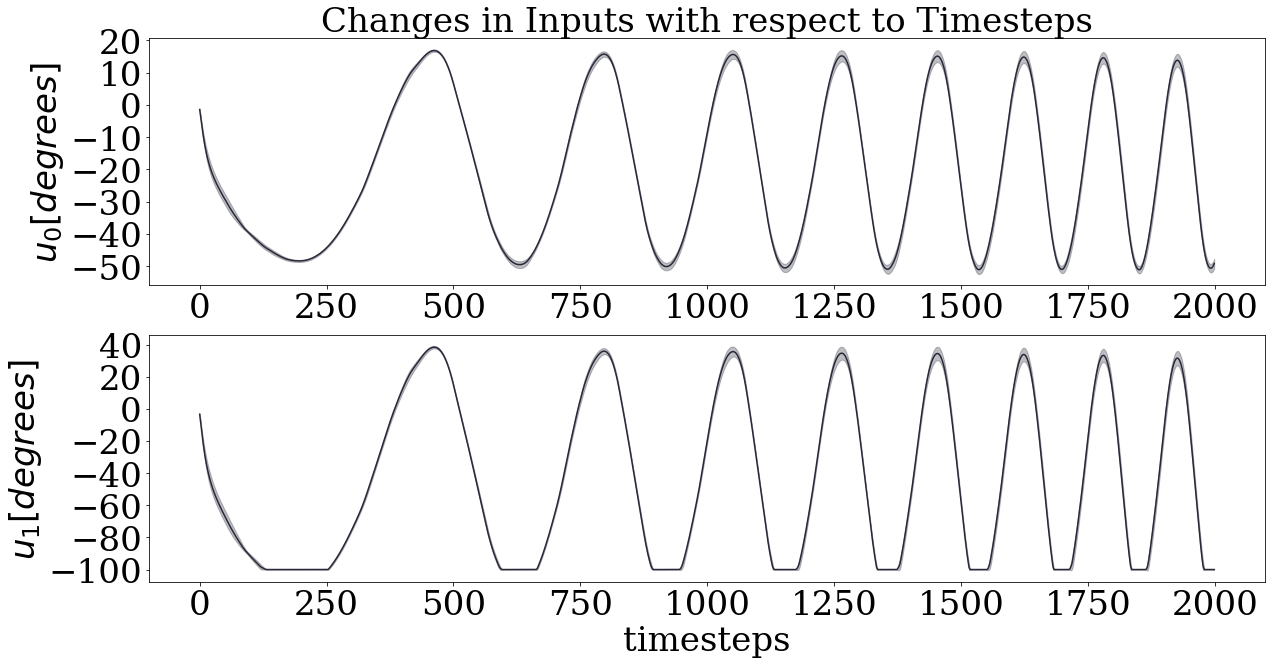

In [88]:
max_input = np.max(np.max(u_optimal_list))
min_input = np.min(np.min(u_optimal_list))
color_palette1= ['#272838', '#F3DE8A', '#F3DE8A', '#F3DE8A']

plt.figure(figsize=(20,10))
for i in range(2):
    plt.subplot(2, 1, i+1)
    plt.plot(np.mean(u_optimal_list, axis =AXIS)[:, i], color = color_palette1[0], label = r'$u_{' + str(i) + "}$" )
    plt.fill_between(timesteps, np.mean(u_optimal_list, axis = AXIS)[:, i] -  np.std(u_optimal_list, axis = AXIS)[:, i],\
                                    np.mean(u_optimal_list, axis = AXIS)[:, i] + np.std(u_optimal_list, axis = AXIS)[:, i],
                                        color = color_palette1[0], 
                                             alpha = 0.3, 
                                                # label = r"$2\sigma$"
                    )


    #plt.legend(prop = {"family": "Times New Roman", "size": 14}, loc= 'right', frameon= True)
    plt.xticks(fontsize=14, **font)
    plt.yticks(fontsize=14, **font)
    #plt.ylim([min_input, max_input])
    plt.ylabel(r'$' + str(labels[-1]) + '_{'+ str(i) + '} [degrees]$', **font)
    if i == 0:
        plt.title('Changes in Inputs with respect to Timesteps', **font)
plt.xlabel('timesteps', **font)
plt.savefig('input.png', dpi = 300 )

#neutral_point = 1000*np.array(neutral_point).reshape(-1, 3)

In [ ]:
fig = plt.figure(figsize=(20,10))

m_predicted_ = np.mean(yn, axis = AXIS)
m_ym = np.mean(ym, axis = AXIS)
m_actual_ = np.mean(actual, axis = AXIS)

ax = Axes3D(fig)
ax.plot3D(m_predicted_[:, 0], m_predicted_[:, 1], m_predicted_[:, 2],color = color_palette[0],  linewidth = 1, alpha = 0.9, label = 'estimated position')
ax.plot3D(m_ym[:, 0], m_ym[:, 1], m_ym[:, 2], color = color_palette[-1],linestyle = 'dashed',  linewidth = 1, alpha = 1, label = 'target')
ax.plot3D(m_actual_[:, 0], m_actual_[:, 1], m_actual_[:, 2], \
                    linewidth = 1, color = color_palette[1], alpha = 1, label = 'actual position')
#ax.set_xlim(-20., 5.)
#ax.set_ylim(-20., 5.)
#ax.set_zlim(-20., 5.)
plt.legend(prop = {"family": "Times New Roman", "size": 24}, loc = 'right', frameon = True)
plt.xticks(fontsize=14, **font)
plt.yticks(fontsize=14, **font)
plt.xlabel('x[mm]', **font)
plt.ylabel('y[mm]', **font)
plt.title('Target Position vs. Controlled Positions', **font)
plt.savefig('3doutput.png', dpi = 300 )

In [ ]:
"""
    Error plot
"""

plt.figure(figsize=(20,10))
print(error_p.shape)
AXIS = 0
timesteps = range(max(yn.shape))
for i in range(1, 3, 1):
    plt.subplot(2, 1, i)
    plt.plot(np.mean(error_c, axis = AXIS), color = 'k', label = 'control RMS  ' + labels[i])
    plt.fill_between(timesteps, np.mean(error_c, axis = AXIS) - np.std(error_c, axis = AXIS) ,\
                        np.mean(error_c, axis = AXIS) + np.std(error_c, axis = AXIS), \
                            color = 'k', alpha = 0.5)
    plt.plot(np.mean(error_p, axis = AXIS), color = 'gray', label = 'prediction RMS')
    plt.fill_between(timesteps, np.mean(error_p, axis = AXIS) - np.std(error_p, axis = AXIS) ,\
                                    np.mean(error_p, axis = AXIS) + np.std(error_p, axis = AXIS), \
                                        color = '#e07a5f', alpha = 0.5)


    #plt.ylim([-50, 50])
    plt.legend(prop = {"family": "Times New Roman", "size": 24}, loc = 'upper right', frameon= True)
    plt.xticks(fontsize=14, **font)
    plt.yticks(fontsize=14, **font)
    plt.ylabel(r"$" + str(labels[i]) + '_{RMS}$', **font)
    if i==2:
        plt.xlabel('timesteps', **font)
    if i==0:
        plt.title("RMS Error", **font)
plt.savefig('error.png', dpi = 300 )

In [ ]:
"""
    Elapsed Time Plot
"""
plt.figure(figsize=(20,10))
AXIS = 0
timesteps = range(max(elapsed.shape))
plt.plot(np.mean(elapsed, axis = AXIS), color = '#D2691E', label = 'time [s]')
plt.fill_between(timesteps, np.mean(elapsed, axis = AXIS)[:, 0] - np.std(elapsed,
    axis = AXIS)[:, 0] ,np.mean(elapsed, axis = AXIS)[:, 0] + np.std(elapsed, axis = AXIS)[:, 0],
                        color = '#D2691E', alpha = 0.5)
#plt.legend(prop = {"family": "Times New Roman", "size": 14}, loc = 'right', frameon = True)
plt.ylabel('Time [s]', **font)
plt.xlabel('timesteps', **font)
plt.title("Control Loop Computation Time", **font)
plt.ylim([0.09, 0.13])
plt.xticks(fontsize=14, **font)
plt.yticks(fontsize=14, **font)
plt.savefig('compute_time.png', dpi = 300 )

In [ ]:
plt.figure(figsize=(20,10))
print(signal.shape)
for i in range(signal.shape[-1]):
    plt.plot(np.mean(signal, axis = 0)[:, i], linewidth = 2., label = 'ch #' + str(i+1))
    plt.fill_between(timesteps, np.mean(signal, axis = 0)[:, i] - np.std(signal,
        axis = 0)[:, i] ,np.mean(signal, axis = 0)[:, i] + np.std(signal, axis = 0)[:, i],
                             alpha = 0.15
            )
plt.legend(fontsize = 24, loc= 'upper left')
plt.title("Tracking of the Mean Optical Lace Signals During Experiment", **font)
plt.xticks(fontsize=14, **font)
plt.yticks(fontsize=14, **font)
plt.xlabel('timestep', **font)
plt.ylabel('Norm. Signal', **font)
plt.savefig('signal.png', dpi = 300 )